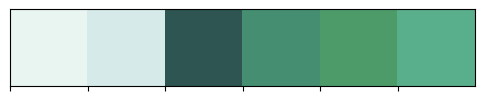

In [16]:
# Data
import pandas as pd
import numpy as np

# Pandas Profiling
#from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Train Test Split
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

# Validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

#color pallet and theme
import matplotlib.colors

colors = ["#e9f5f0","#d5eae9","#2e5551",'#468e71','#4d9b68','#59ae8c']
colors2 = ["#2e5551",'#468e71','#4d9b68','#59ae8c', "#e9f5f0","#d5eae9"]
cmap = matplotlib.colors.ListedColormap(colors2)

sns.palplot(sns.color_palette(colors))

In [17]:
data = pd.read_csv('/kaggle/input/car-price-prediction-train/train.csv')

In [18]:
Df=pd.DataFrame(data)

In [19]:
Df = Df.drop(columns=['clean_title','ext_col','int_col'])
print(Df)

          id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                               

In [20]:
Df.shape

(54273, 10)

In [21]:
Df.info

<bound method DataFrame.info of           id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_typ

In [39]:
for col in Df.columns:
    print('Unique values of ' + col)
    print(Df[col].unique())
    print("======================")

Unique values of id
[    0     1     2 ... 54270 54271 54272]
Unique values of brand
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Unique values of model
[   0    1    2 ... 1824 1825 1826]
Unique values of model_year
[2018 2007 2009 2022 2001 2003 2014 2019 2016 2017 2013 2021 2015 2020
 2012 2006 2023 2011 2010 1999 2004 1993 2002 2005 2008 1995 1998 2000
 1997 1994 1996 2024 1992 1974]
Unique values of milage
[74349 80000 91491 ... 62850 82984 28750]
Unique values of fuel_type
[0 1 2 3 4 5 6]
Unique values of engine
[   0    1    2 ... 1058 1059 1060]
Unique values of transmission
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Unique values of accident
[0 1]
Unique values of price
[ 11000   8250  15000 ... 269991  32798  37998]


In [23]:
brand = ['Ford', 'BMW', 'Jaguar', 'Pontiac', 'Acura', 'Audi', 'GMC', 'Maserati', 'Chevrolet', 
          'Porsche', 'Mercedes-Benz', 'Tesla', 'Lexus', 'Kia', 'Lincoln', 'Dodge', 'Volkswagen', 
          'Land', 'Cadillac', 'Mazda', 'RAM', 'Subaru', 'Hyundai', 'MINI', 'Jeep', 'Honda', 'Hummer', 
          'Nissan', 'Toyota', 'Volvo', 'Genesis', 'Mitsubishi', 'Buick', 'INFINITI', 'McLaren', 'Scion', 
          'Lamborghini', 'Bentley', 'Suzuki', 'Ferrari', 'Alfa', 'Rolls-Royce', 'Chrysler', 'Aston', 
          'Rivian', 'Lotus', 'Saturn', 'Lucid', 'Mercury', 'Maybach', 'FIAT', 'Plymouth', 'Bugatti']

# Create a mapping dictionary
brand_to_number = {brand: idx for idx, brand in enumerate(brand)}

# Replace the brand names with their corresponding numbers
Df['brand'] = Df['brand'].map(brand_to_number)

print(Df)

          id  brand                             model  model_year  milage  \
0          0      0                      F-150 Lariat        2018   74349   
1          1      1                             335 i        2007   80000   
2          2      2                         XF Luxury        2009   91491   
3          3      1                      X7 xDrive40i        2022    2437   
4          4      3                     Firebird Base        2001  111000   
...      ...    ...                               ...         ...     ...   
54268  54268      1                      X6 xDrive50i        2017   29000   
54269  54269      5                   A4 2.0T Premium        2015   94634   
54270  54270      9                         Cayenne S        2013   40989   
54271  54271      9                 911 Carrera 4 GTS        2023    1518   
54272  54272      5  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                                             engine  \


In [29]:
Df['transmission'].unique()

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', '8-Speed A/T',
       'Transmission Overdrive Switch', '9-Speed Automatic',
       '7-Speed M/T', '10-Speed Automatic', '6-Speed Automatic', 'M/T',
       '5-Speed Automatic', 'CVT Transmission', '9-Speed A/T',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic', '1-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed DCT Automatic',
       'Automatic CVT', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '7-Speed Manual',
       '6-Speed Electronically Controlled Automatic with O',
       '1-Speed Automatic', '10-Speed Automatic with Overdrive',
       '8-Speed Manual', '2-Speed A/T', 'CVT-F', '–', 'F',
       '9-Speed Automatic with Auto-Shift', '7-Speed', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Spe

In [26]:
fuel_types = ['Gasoline',
 'Hybrid',
 'E85 Flex Fuel',
 'Diesel',
 '–',
 'Plug-In Hybrid',
 'not supported']

fuel_type_to_number = {fuel_type: idx for idx, fuel_type in enumerate(fuel_types)}
Df['fuel_type'] = Df['fuel_type'].map(fuel_type_to_number)
print(Df)


          id  brand                             model  model_year  milage  \
0          0      0                      F-150 Lariat        2018   74349   
1          1      1                             335 i        2007   80000   
2          2      2                         XF Luxury        2009   91491   
3          3      1                      X7 xDrive40i        2022    2437   
4          4      3                     Firebird Base        2001  111000   
...      ...    ...                               ...         ...     ...   
54268  54268      1                      X6 xDrive50i        2017   29000   
54269  54269      5                   A4 2.0T Premium        2015   94634   
54270  54270      9                         Cayenne S        2013   40989   
54271  54271      9                 911 Carrera 4 GTS        2023    1518   
54272  54272      5  A5 Sportback S line Premium Plus        2021   35000   

       fuel_type                                             engine  \
0   

In [30]:
transmission_type = ['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', '8-Speed A/T',
       'Transmission Overdrive Switch', '9-Speed Automatic',
       '7-Speed M/T', '10-Speed Automatic', '6-Speed Automatic', 'M/T',
       '5-Speed Automatic', 'CVT Transmission', '9-Speed A/T',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic', '1-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed DCT Automatic',
       'Automatic CVT', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '7-Speed Manual',
       '6-Speed Electronically Controlled Automatic with O',
       '1-Speed Automatic', '10-Speed Automatic with Overdrive',
       '8-Speed Manual', '2-Speed A/T', 'CVT-F', '–', 'F',
       '9-Speed Automatic with Auto-Shift', '7-Speed', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Speed', '6 Speed At/Mt',
       '6 Speed Mt']

transmission_to_number = {transmission: idx for idx, transmission in enumerate(transmission_type)}
Df['transmission'] = Df['transmission'].map(transmission_to_number)
print(Df)


          id  brand                             model  model_year  milage  \
0          0      0                      F-150 Lariat        2018   74349   
1          1      1                             335 i        2007   80000   
2          2      2                         XF Luxury        2009   91491   
3          3      1                      X7 xDrive40i        2022    2437   
4          4      3                     Firebird Base        2001  111000   
...      ...    ...                               ...         ...     ...   
54268  54268      1                      X6 xDrive50i        2017   29000   
54269  54269      5                   A4 2.0T Premium        2015   94634   
54270  54270      9                         Cayenne S        2013   40989   
54271  54271      9                 911 Carrera 4 GTS        2023    1518   
54272  54272      5  A5 Sportback S line Premium Plus        2021   35000   

       fuel_type                                             engine  \
0   

In [31]:
Df['accident'] = Df['accident'].replace({'None reported': 0, 'At least 1 accident or damage reported': 1})
print(Df)

          id  brand                             model  model_year  milage  \
0          0      0                      F-150 Lariat        2018   74349   
1          1      1                             335 i        2007   80000   
2          2      2                         XF Luxury        2009   91491   
3          3      1                      X7 xDrive40i        2022    2437   
4          4      3                     Firebird Base        2001  111000   
...      ...    ...                               ...         ...     ...   
54268  54268      1                      X6 xDrive50i        2017   29000   
54269  54269      5                   A4 2.0T Premium        2015   94634   
54270  54270      9                         Cayenne S        2013   40989   
54271  54271      9                 911 Carrera 4 GTS        2023    1518   
54272  54272      5  A5 Sportback S line Premium Plus        2021   35000   

       fuel_type                                             engine  \
0   

In [33]:
for col in Df.columns:
    print('Unique values of ' + col)
    print(Df[col].unique())
    print("======================")

Unique values of id
[    0     1     2 ... 54270 54271 54272]
Unique values of brand
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Unique values of model
['F-150 Lariat' '335 i' 'XF Luxury' ... 'Q4 e-tron Sportback Premium'
 'Countryman Cooper' 'S-10 LS']
Unique values of model_year
[2018 2007 2009 2022 2001 2003 2014 2019 2016 2017 2013 2021 2015 2020
 2012 2006 2023 2011 2010 1999 2004 1993 2002 2005 2008 1995 1998 2000
 1997 1994 1996 2024 1992 1974]
Unique values of milage
[74349 80000 91491 ... 62850 82984 28750]
Unique values of fuel_type
[0 1 2 3 4 5 6]
Unique values of engine
['375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel'
 '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel'
 '300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel' ... '3.0L'
 '3.0 Liter GTDI' '120.0HP 2.2L 4 Cylinder Engine Flex Fuel Capability']
Unique values of transmission
[ 0  1  2  3  4  5  6  7

In [35]:
unique_models = Df['model'].unique()
model_to_number = {model: idx for idx, model in enumerate(unique_models)}
Df['model'] = Df['model'].map(model_to_number)
print(Df)

          id  brand  model  model_year  milage  fuel_type  \
0          0      0      0        2018   74349          0   
1          1      1      1        2007   80000          0   
2          2      2      2        2009   91491          0   
3          3      1      3        2022    2437          1   
4          4      3      4        2001  111000          0   
...      ...    ...    ...         ...     ...        ...   
54268  54268      1    466        2017   29000          0   
54269  54269      5     87        2015   94634          2   
54270  54270      9     12        2013   40989          0   
54271  54271      9    612        2023    1518          0   
54272  54272      5   1803        2021   35000          1   

                                                  engine  transmission  \
0          375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             0   
1      300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...             1   
2           300.0HP 4.2L 8 Cylinder Engine Ga

In [38]:
unique_engines = Df['engine'].unique()
engine_to_number = {engine: idx for idx, engine in enumerate(unique_engines)}
Df['engine'] = Df['engine'].map(engine_to_number)
print(Df)


          id  brand  model  model_year  milage  fuel_type  engine  \
0          0      0      0        2018   74349          0       0   
1          1      1      1        2007   80000          0       1   
2          2      2      2        2009   91491          0       2   
3          3      1      3        2022    2437          1       3   
4          4      3      4        2001  111000          0       4   
...      ...    ...    ...         ...     ...        ...     ...   
54268  54268      1    466        2017   29000          0      47   
54269  54269      5     87        2015   94634          2     380   
54270  54270      9     12        2013   40989          0     456   
54271  54271      9    612        2023    1518          0     339   
54272  54272      5   1803        2021   35000          1     954   

       transmission  accident   price  
0                 0         0   11000  
1                 1         0    8250  
2                 2         0   15000  
3          

In [40]:
Df.to_csv('/kaggle/working/new.csv', encoding='utf-8', index=False)

In [41]:
brand_counts = Df['brand'].value_counts()
print(brand_counts)

brand
1     7369
0     6706
10    5087
8     4424
5     2922
9     2627
28    2315
12    2257
24    2247
17    1995
18    1565
27    1252
6     1076
15    1011
20     966
33     957
14     767
19     748
21     739
22     694
2      661
16     628
25     624
4      580
13     526
29     452
23     364
7      293
37     284
42     258
30     249
32     228
31     182
26     176
3      149
40     144
41     142
36     122
11     110
39      87
46      58
35      53
43      50
34      43
44      27
48      20
50      16
45      12
38       4
49       3
47       2
51       1
52       1
Name: count, dtype: int64


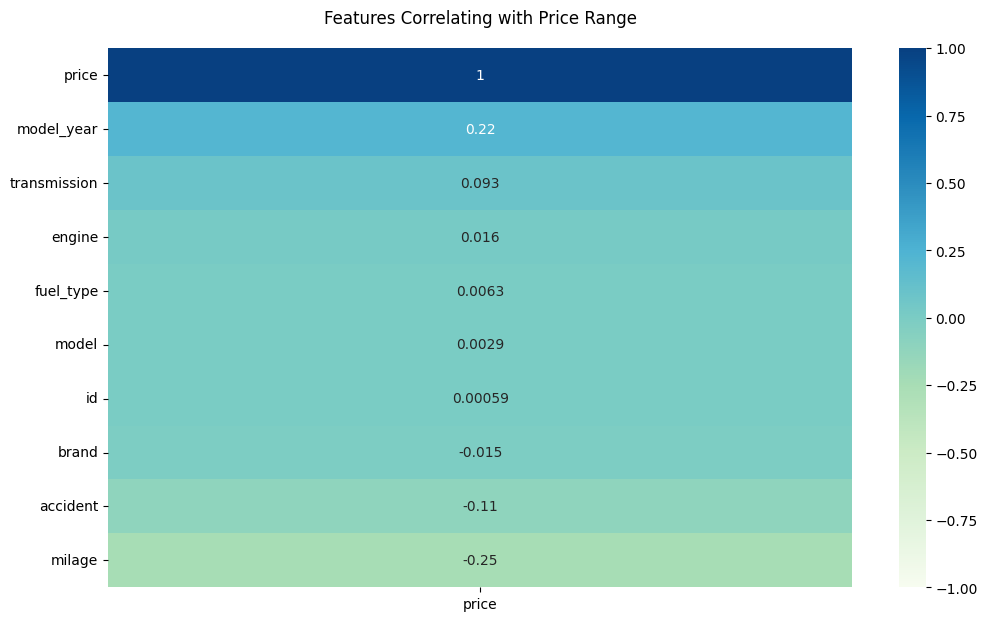

In [42]:
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (Df.corr()[['price']].sort_values (by = 'price', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12}, pad = 18);

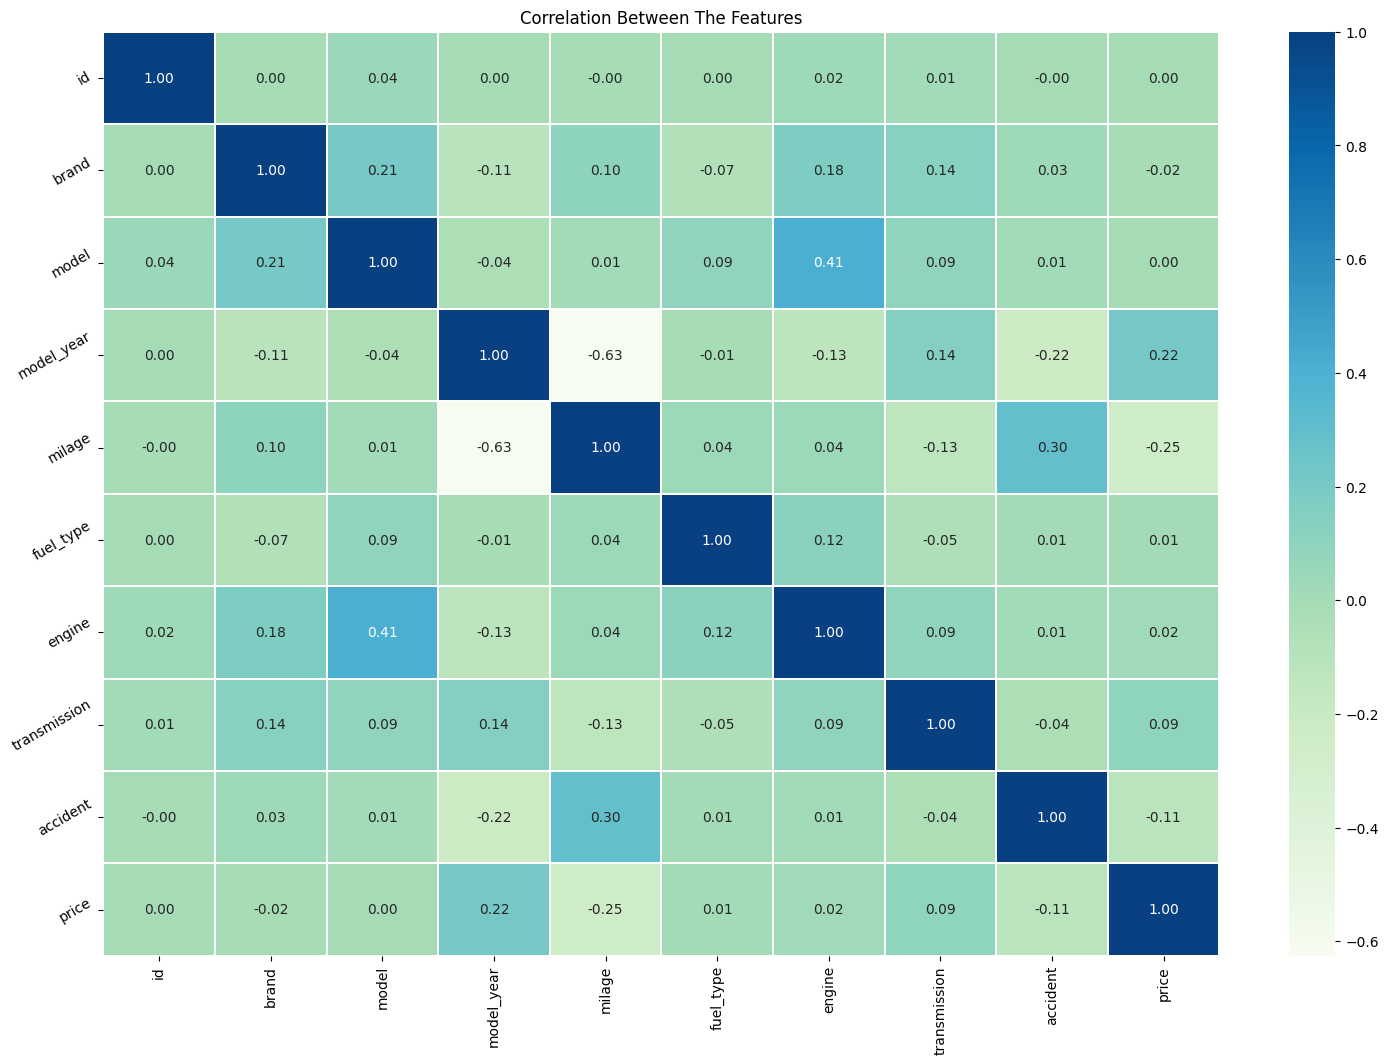

In [43]:
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features')
a = sns.heatmap(Df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()